# SVM implentation

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [3]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

# hyperplane for plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]


(250, 2)
(250,)
SVM Accuracy:  1.0


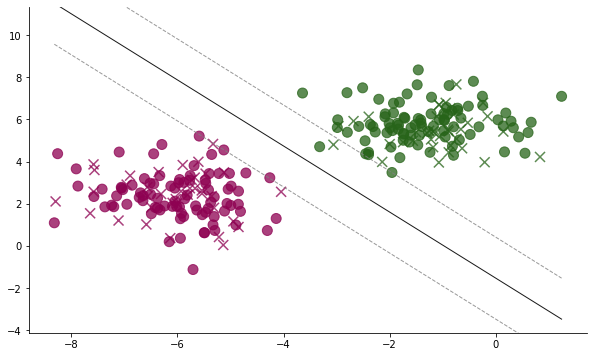

In [4]:
N_SAMPLES = 250
STD = 1.0
SEED = 1234
N_DIM = 2
N_CENTERS = 2
TRN_TST_SPLIT = 0.3
N_ITER = 2000

X, y = datasets.make_blobs(n_samples=N_SAMPLES, 
                            n_features=N_DIM, 
                            centers=N_CENTERS, 
                            cluster_std=STD, 
                            random_state=SEED
                            )

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRN_TST_SPLIT, shuffle=True, random_state=SEED)

clf = SVM(n_iters=N_ITER)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("SVM Accuracy: ", accuracy(y_test, predictions))
    
fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()

## Load points distributed along an ellipses

(1000, 2)
(1000,)


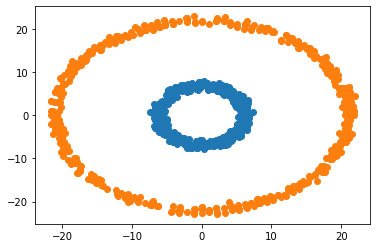

In [1]:
import matplotlib.pyplot as plt
import os
import scipy.io as sio

cls_data = {}

mdic = sio.loadmat("ellipse_data_large.mat")
X_data, y_data = mdic["X_data"], mdic["y_data"][0]
print(X_data.shape)
print(y_data.shape)

X_data_0 = X_data[y_data == 0]
X_data_1 = X_data[y_data == 1]
cls_data['0'] = {'x': X_data_0[:, 0], 'y': X_data_0[:, 1]}
cls_data['1'] = {'x': X_data_1[:, 0], 'y': X_data_1[:, 1]}
fig = plt.figure()
ax = fig.gca()
for key, d_cord in cls_data.items():
    ax.scatter(d_cord['y'], d_cord['x'])
plt.show()

## Kernel trick experiments

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=TRN_TST_SPLIT, shuffle=True, random_state=SEED)

elp_clf_2d = SVM(n_iters=N_ITER)
elp_clf_2d.fit(X_train, y_train)
predictions = elp_clf_2d.predict(X_test)

print("SVM Accuracy: ", accuracy(y_test, predictions))


SVM Accuracy:  0.7033333333333334


In [12]:
X_norm = X_data[:,0]**2 + X_data[:,1]**2
X_data_3d_1 = np.hstack((X_data, X_norm[:,None]))

X1_sq = X_data[:,0]**2
X12 = 2*X_data[:,0]*X_data[:,1]
X2_sq = X_data[:,1]**2
X_data_3d_2 = np.hstack((X1_sq[:,None], X12[:,None], X2_sq[:,None]))

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_data_3d_1, y_data, test_size=TRN_TST_SPLIT, shuffle=True, random_state=SEED)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_3d_2, y_data, test_size=TRN_TST_SPLIT, shuffle=True, random_state=SEED)

elp_clf_3d_1 = SVM(n_iters=N_ITER)
elp_clf_3d_2 = SVM(n_iters=N_ITER)

elp_clf_3d_1.fit(X_train_1, y_train_1)
elp_clf_3d_2.fit(X_train_2, y_train_2)

predictions_1 = elp_clf_3d_1.predict(X_test_1)
predictions_2 = elp_clf_3d_2.predict(X_test_2)

print("SVM Accuracy_1: ", accuracy(y_test_1, predictions_1))
print("SVM Accuracy_2: ", accuracy(y_test_2, predictions_2))


SVM Accuracy_1:  1.0
SVM Accuracy_2:  1.0
